In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
PATH_TO_ROOT = "../data/lfw/" # End with a /

In [3]:
def center_crop(img, output_shape=(112,112)):
    original_shape = img.shape
    shave_off = ((original_shape[0]-output_shape[0])//2, (original_shape[1]-output_shape[1])//2)
    cropped_img = img[shave_off[0]:-shave_off[0],shave_off[1]:-shave_off[1]]
    cropped_img = cv2.resize(cropped_img, output_shape)
    return cropped_img[:,:,::-1] # BGR -> RGB

### Load Images Data and Reshape to (112,112)

100%|██████████| 13233/13233 [00:50<00:00, 263.87it/s]

Loaded 13233 images
Shape of images : (112, 112, 3)


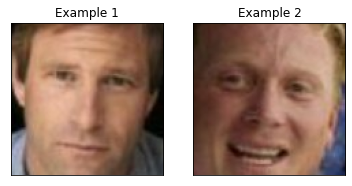

In [4]:
IMAGES_TO_READ = 13233
images_data = []
progress_bar = tqdm(total=IMAGES_TO_READ)
for folder in glob.glob(f"{PATH_TO_ROOT}*"):
    folder_name = folder.split('\\')[-1]

    # if len(images_data)>IMAGES_TO_READ : break

    for img in glob.glob(f"{PATH_TO_ROOT}{folder_name}/*.jpg"):
        # print(img)
        images_data.append(center_crop(cv2.imread(img, cv2.IMREAD_COLOR), (112,112)))
        progress_bar.update(1)
progress_bar.close()
print()
print(f"Loaded {len(images_data)} images")
print(f"Shape of images : {images_data[0].shape}")
plt.subplot(121), plt.imshow(images_data[0]), plt.title("Example 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(images_data[1]), plt.title("Example 2"), plt.xticks([]), plt.yticks([])
plt.show()

### Obfuscate the Images with Gaussian Blur

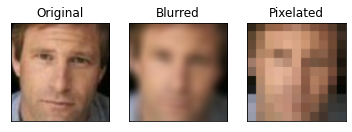

In [10]:
PIXELATION_STRENGTH = 10
INTERIM_HEIGHT, INTERIM_WIDTH = 112//PIXELATION_STRENGTH, 112//PIXELATION_STRENGTH
INTERPOLATION_STRATEGY = cv2.INTER_AREA
images_data_obfuscated = []

for img in images_data:
    temp = cv2.resize(img, (INTERIM_WIDTH, INTERIM_HEIGHT), interpolation=INTERPOLATION_STRATEGY)
    images_data_obfuscated.append(cv2.resize(temp, (112, 112), interpolation=INTERPOLATION_STRATEGY))

plt.subplot(131), plt.imshow(images_data[0]), plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blur_eg), plt.title("Blurred"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(images_data_obfuscated[0]), plt.title("Pixelated"), plt.xticks([]), plt.yticks([])
plt.show()

### Split into train-val-test

In [55]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(images_data_obfuscated, images_data, test_size=0.1, random_state=1)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=1)

print(f"Train set size : {len(train_x)}")
print(f"Validation set size : {len(val_x)}")
print(f"Test set size : {len(test_x)}")

Train set size : 10718
Validation set size : 1191
Test set size : 1324


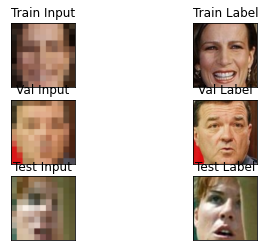

In [56]:
plt.subplot(321), plt.imshow(train_x[0]), plt.title("Train Input"), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(train_y[0]), plt.title("Train Label"), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(val_x[0]), plt.title("Val Input"), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(val_y[0]), plt.title("Val Label"), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(test_x[0]), plt.title("Test Input"), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(test_y[0]), plt.title("Test Label"), plt.xticks([]), plt.yticks([])
plt.show()

### Save data into npz for easy use later

In [57]:
DUMP_FILE_NAME = "Data_All_Pix_Extreme2.npz"
np.savez(f"../data/dump/{DUMP_FILE_NAME}",train_x=train_x, train_y=train_y, val_x=val_x, val_y=val_y, test_x=test_x, test_y=test_y)

#### Sanity Check

In [42]:
load_dump = np.load(f"../data/dump/{DUMP_FILE_NAME}")
load_dump.files

['train_x', 'train_y', 'val_x', 'val_y', 'test_x', 'test_y']

In [43]:
a,b,c,d,e,f = load_dump['train_x'],load_dump['train_y'],load_dump['val_x'],load_dump['val_y'],load_dump['test_x'],load_dump['test_y']
print(a.shape, b.shape)
print(c.shape, d.shape)
print(e.shape, f.shape)

(10718, 112, 112, 3) (10718, 112, 112, 3)
(1191, 112, 112, 3) (1191, 112, 112, 3)
(1324, 112, 112, 3) (1324, 112, 112, 3)


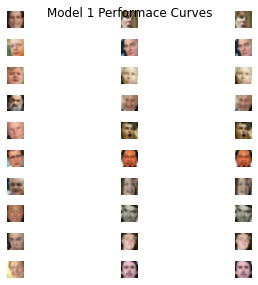

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 3)

for i in range(10):
    ax[i,0].imshow(train_x[i]), ax[i,0].axis('off')
    ax[i,1].imshow(test_x[i]), ax[i,1].axis('off')
    ax[i,2].imshow(test_x[i]), ax[i,2].axis('off')

plt.suptitle("Model 1 Performace Curves")
fig.tight_layout()

plt.show()